## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

In [2]:
# Load the dataset
df = pd.read_csv('../../Data/pre_ADA-USD.csv')
data = df['Close'].values.reshape(-1, 1)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Days_Since_Start
0,0.311973,0.311973,0.288392,0.304397,0.304397,184691008,0
1,0.304424,0.307058,0.288875,0.293504,0.293504,107240000,1
2,0.292952,0.309129,0.292507,0.297106,0.297106,115320000,2
3,0.296285,0.303588,0.286193,0.300787,0.300787,94436000,3
4,0.299897,0.317723,0.291055,0.297622,0.297622,202675008,4


In [4]:
df= df.drop(columns=["Open", "High", "Low", "Adj Close","Volume"])

In [5]:
df = df.rename(columns={'Close': 'Price'})
df = pd.DataFrame(data=df)

In [6]:
df

,Price,Days_Since_Start
0,0.304397,0
1,0.293504,1
2,0.297106,2
3,0.300787,3
4,0.297622,4
...,...,...
2280,0.456990,2280
2281,0.450995,2281
2282,0.446581,2282
2283,0.447461,2283


In [7]:
y = df['Price'] 
X=df['Days_Since_Start'] 
X = pd.DataFrame(data=X)
y = pd.DataFrame(data=y)
# using the train test split function 7-3 
# X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, test_size=0.3) 

split_index = int(len(X) * 0.7)

# Split the data by index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [8]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [9]:
mean_squared_error(y_test,y_pred)

1.4595936941185834

c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


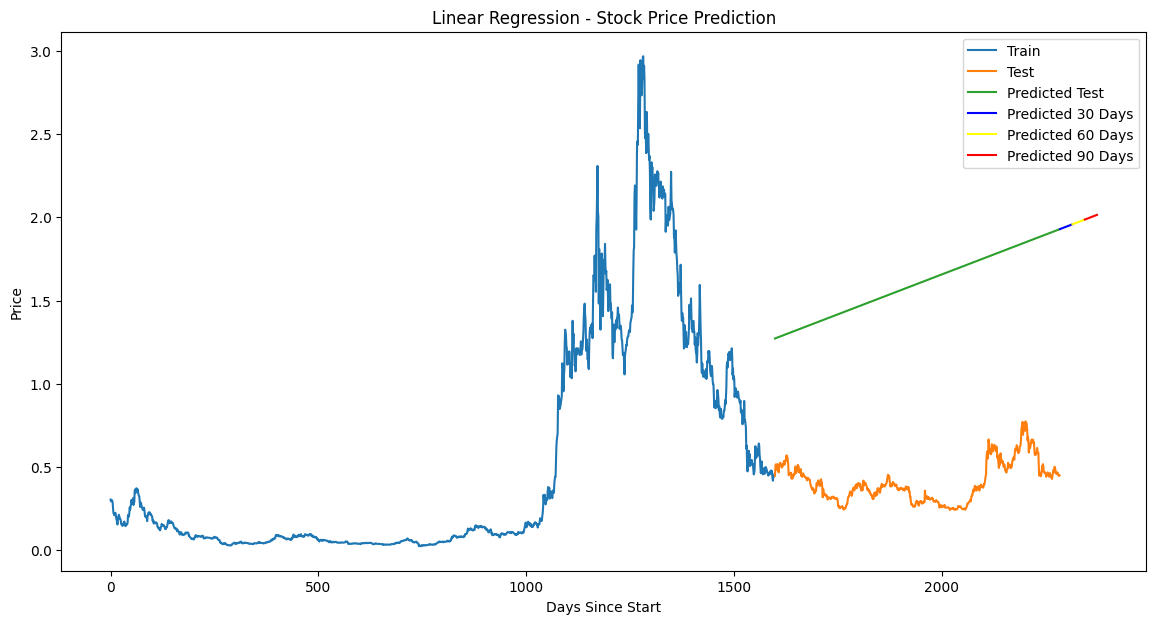

In [10]:
# Generate future date indices for 30, 60, and 90 days
future_index_30 = pd.RangeIndex(start=len(X_train) + len(X_test), stop=len(X_train) + len(X_test) + 30, step=1)
future_index_60 = pd.RangeIndex(start=len(X_train) + len(X_test) + 30, stop=len(X_train) + len(X_test) + 60, step=1)
future_index_90 = pd.RangeIndex(start=len(X_train) + len(X_test) + 60, stop=len(X_train) + len(X_test) + 90, step=1)

# Prepare the future dates in the same format as your training data
X_future_30 = pd.DataFrame(future_index_30)
X_future_60 = pd.DataFrame(future_index_60)
X_future_90 = pd.DataFrame(future_index_90)

# Predict the 'Price' for the future dates
y_pred_future_30 = model.predict(X_future_30)
y_pred_future_60 = model.predict(X_future_60)
y_pred_future_90 = model.predict(X_future_90)

plt.figure(figsize=(14, 7))
# Create index ranges for plotting
train_data_index = pd.RangeIndex(start=0, stop=len(X_train), step=1)
test_data_index = pd.RangeIndex(start=len(X_train), stop=len(X_train) + len(X_test), step=1)
# Plot the training, testing, and predicted test data
plt.plot(train_data_index, y_train, label='Train')
plt.plot(test_data_index, y_test, label='Test')
plt.plot(test_data_index, y_pred, label='Predicted Test')

# Plot the predicted future 'Price' values
plt.plot(future_index_30, y_pred_future_30, label='Predicted 30 Days', color='blue')
plt.plot(future_index_60, y_pred_future_60, label='Predicted 60 Days', color='yellow')
plt.plot(future_index_90, y_pred_future_90, label='Predicted 90 Days', color='red')

# Set the title and labels
plt.title('Linear Regression - Stock Price Prediction')
plt.xlabel('Days Since Start')
plt.ylabel('Price')

# Show legend
plt.legend()

# Display the plot
plt.show()

c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


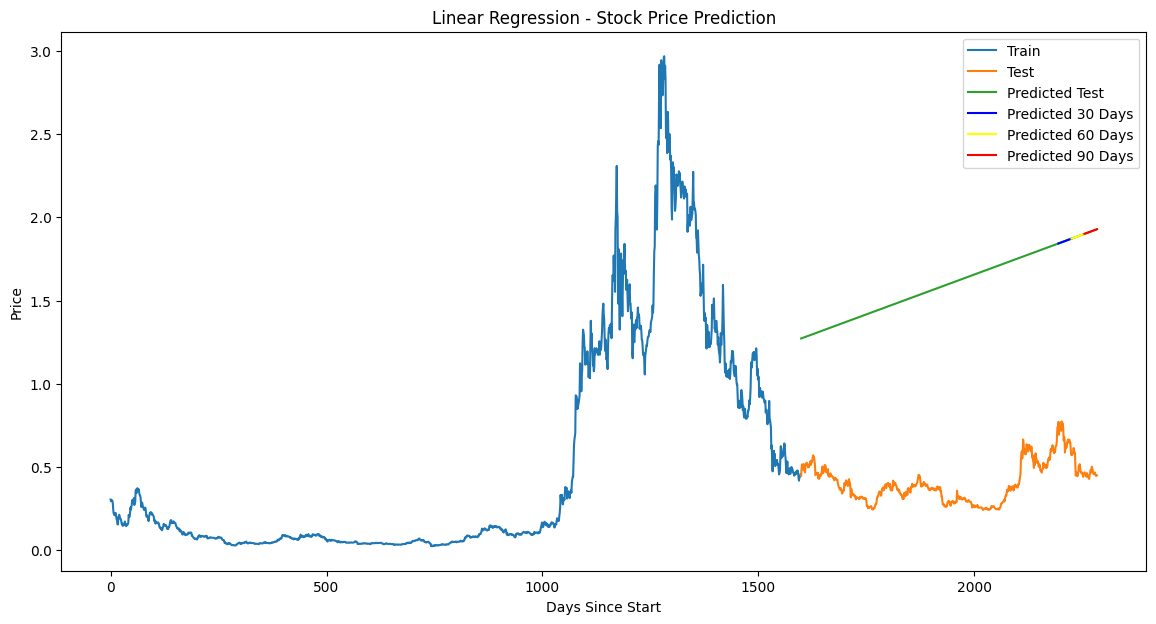

In [11]:
# Generate future date indices for 30, 60, and 90 days
future_index_30 = pd.RangeIndex(start=len(X_train) + len(X_test)-90, stop=len(X_train) + len(X_test) -60, step=1)
future_index_60 = pd.RangeIndex(start=len(X_train) + len(X_test) -60, stop=len(X_train) + len(X_test) -30, step=1)
future_index_90 = pd.RangeIndex(start=len(X_train) + len(X_test) -30, stop=len(X_train) + len(X_test), step=1)

# Prepare the future dates in the same format as your training data
X_future_30 = pd.DataFrame(future_index_30)
X_future_60 = pd.DataFrame(future_index_60)
X_future_90 = pd.DataFrame(future_index_90)

# Predict the 'Price' for the future dates
y_pred_future_30 = model.predict(X_future_30)
y_pred_future_60 = model.predict(X_future_60)
y_pred_future_90 = model.predict(X_future_90)

plt.figure(figsize=(14, 7))
# Create index ranges for plotting
train_data_index = pd.RangeIndex(start=0, stop=len(X_train), step=1)
test_data_index = pd.RangeIndex(start=len(X_train), stop=len(X_train) + len(X_test), step=1)
# Plot the training, testing, and predicted test data
plt.plot(train_data_index, y_train, label='Train')
plt.plot(test_data_index, y_test, label='Test')
plt.plot(test_data_index, y_pred, label='Predicted Test')

# Plot the predicted future 'Price' values
plt.plot(future_index_30, y_pred_future_30, label='Predicted 30 Days', color='blue')
plt.plot(future_index_60, y_pred_future_60, label='Predicted 60 Days', color='yellow')
plt.plot(future_index_90, y_pred_future_90, label='Predicted 90 Days', color='red')

# Set the title and labels
plt.title('Linear Regression - Stock Price Prediction')
plt.xlabel('Days Since Start')
plt.ylabel('Price')

# Show legend
plt.legend()

# Display the plot
plt.show()